In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import seaborn as sns


In [9]:
df = pd.read_csv('seattle-weather.csv')

In [10]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [11]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [12]:
df.duplicated().sum()

0

In [13]:
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [14]:
len(training_set)

1461

In [15]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [16]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [17]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [18]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 239.3237 - val_loss: 247.5506
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 99.2710 - val_loss: 166.5752
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 76.7637 - val_loss: 137.0156
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 65.4675 - val_loss: 118.1549
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 61.4263 - val_loss: 104.7301
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 60.4811 - val_loss: 95.2320
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 51.5701 - val_loss: 88.7100
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 56.4360 - val_loss: 83.8082
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 54.6016 - val_loss: 81.3513
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 51.8376 - val_loss: 78.8083
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 49.9459 - val_loss: 77.6703
Epoch 12/100
25/25 ━━━━

In [20]:
his = pd.DataFrame(history.history)
his.head()


,loss,val_loss
0,203.572418,247.550583
1,94.285095,166.575211
2,73.622826,137.015640
3,64.064812,118.154854
4,59.738190,104.730133


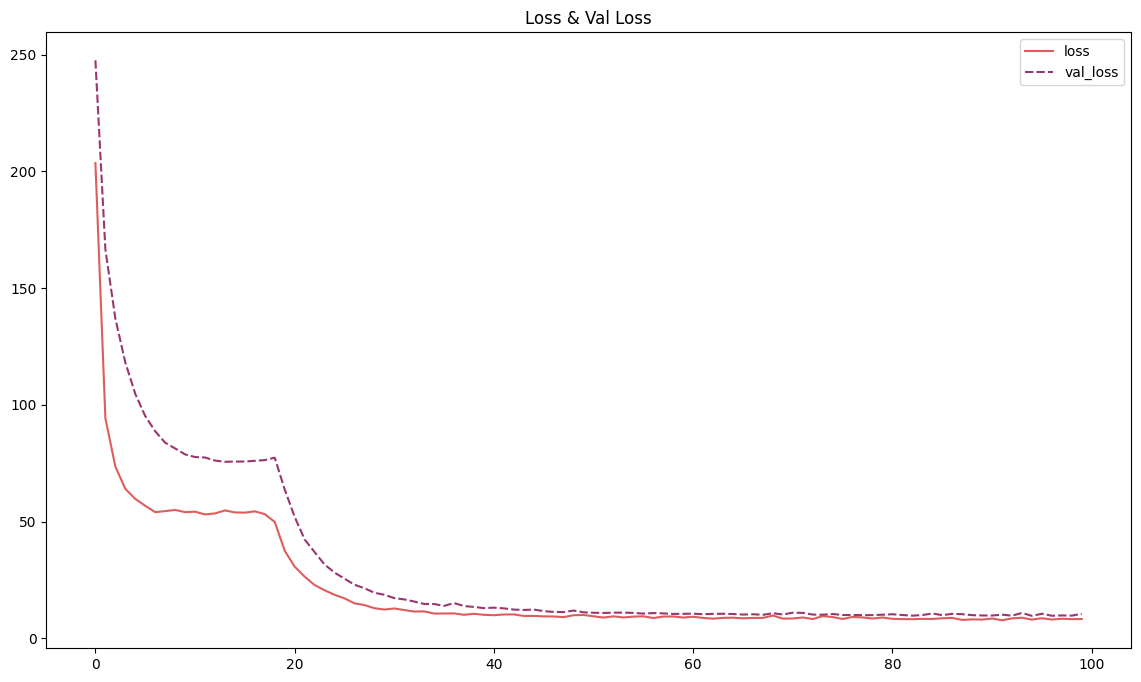

In [21]:
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(1,1,figsize=(14,8))
plt.subplot(1,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [22]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


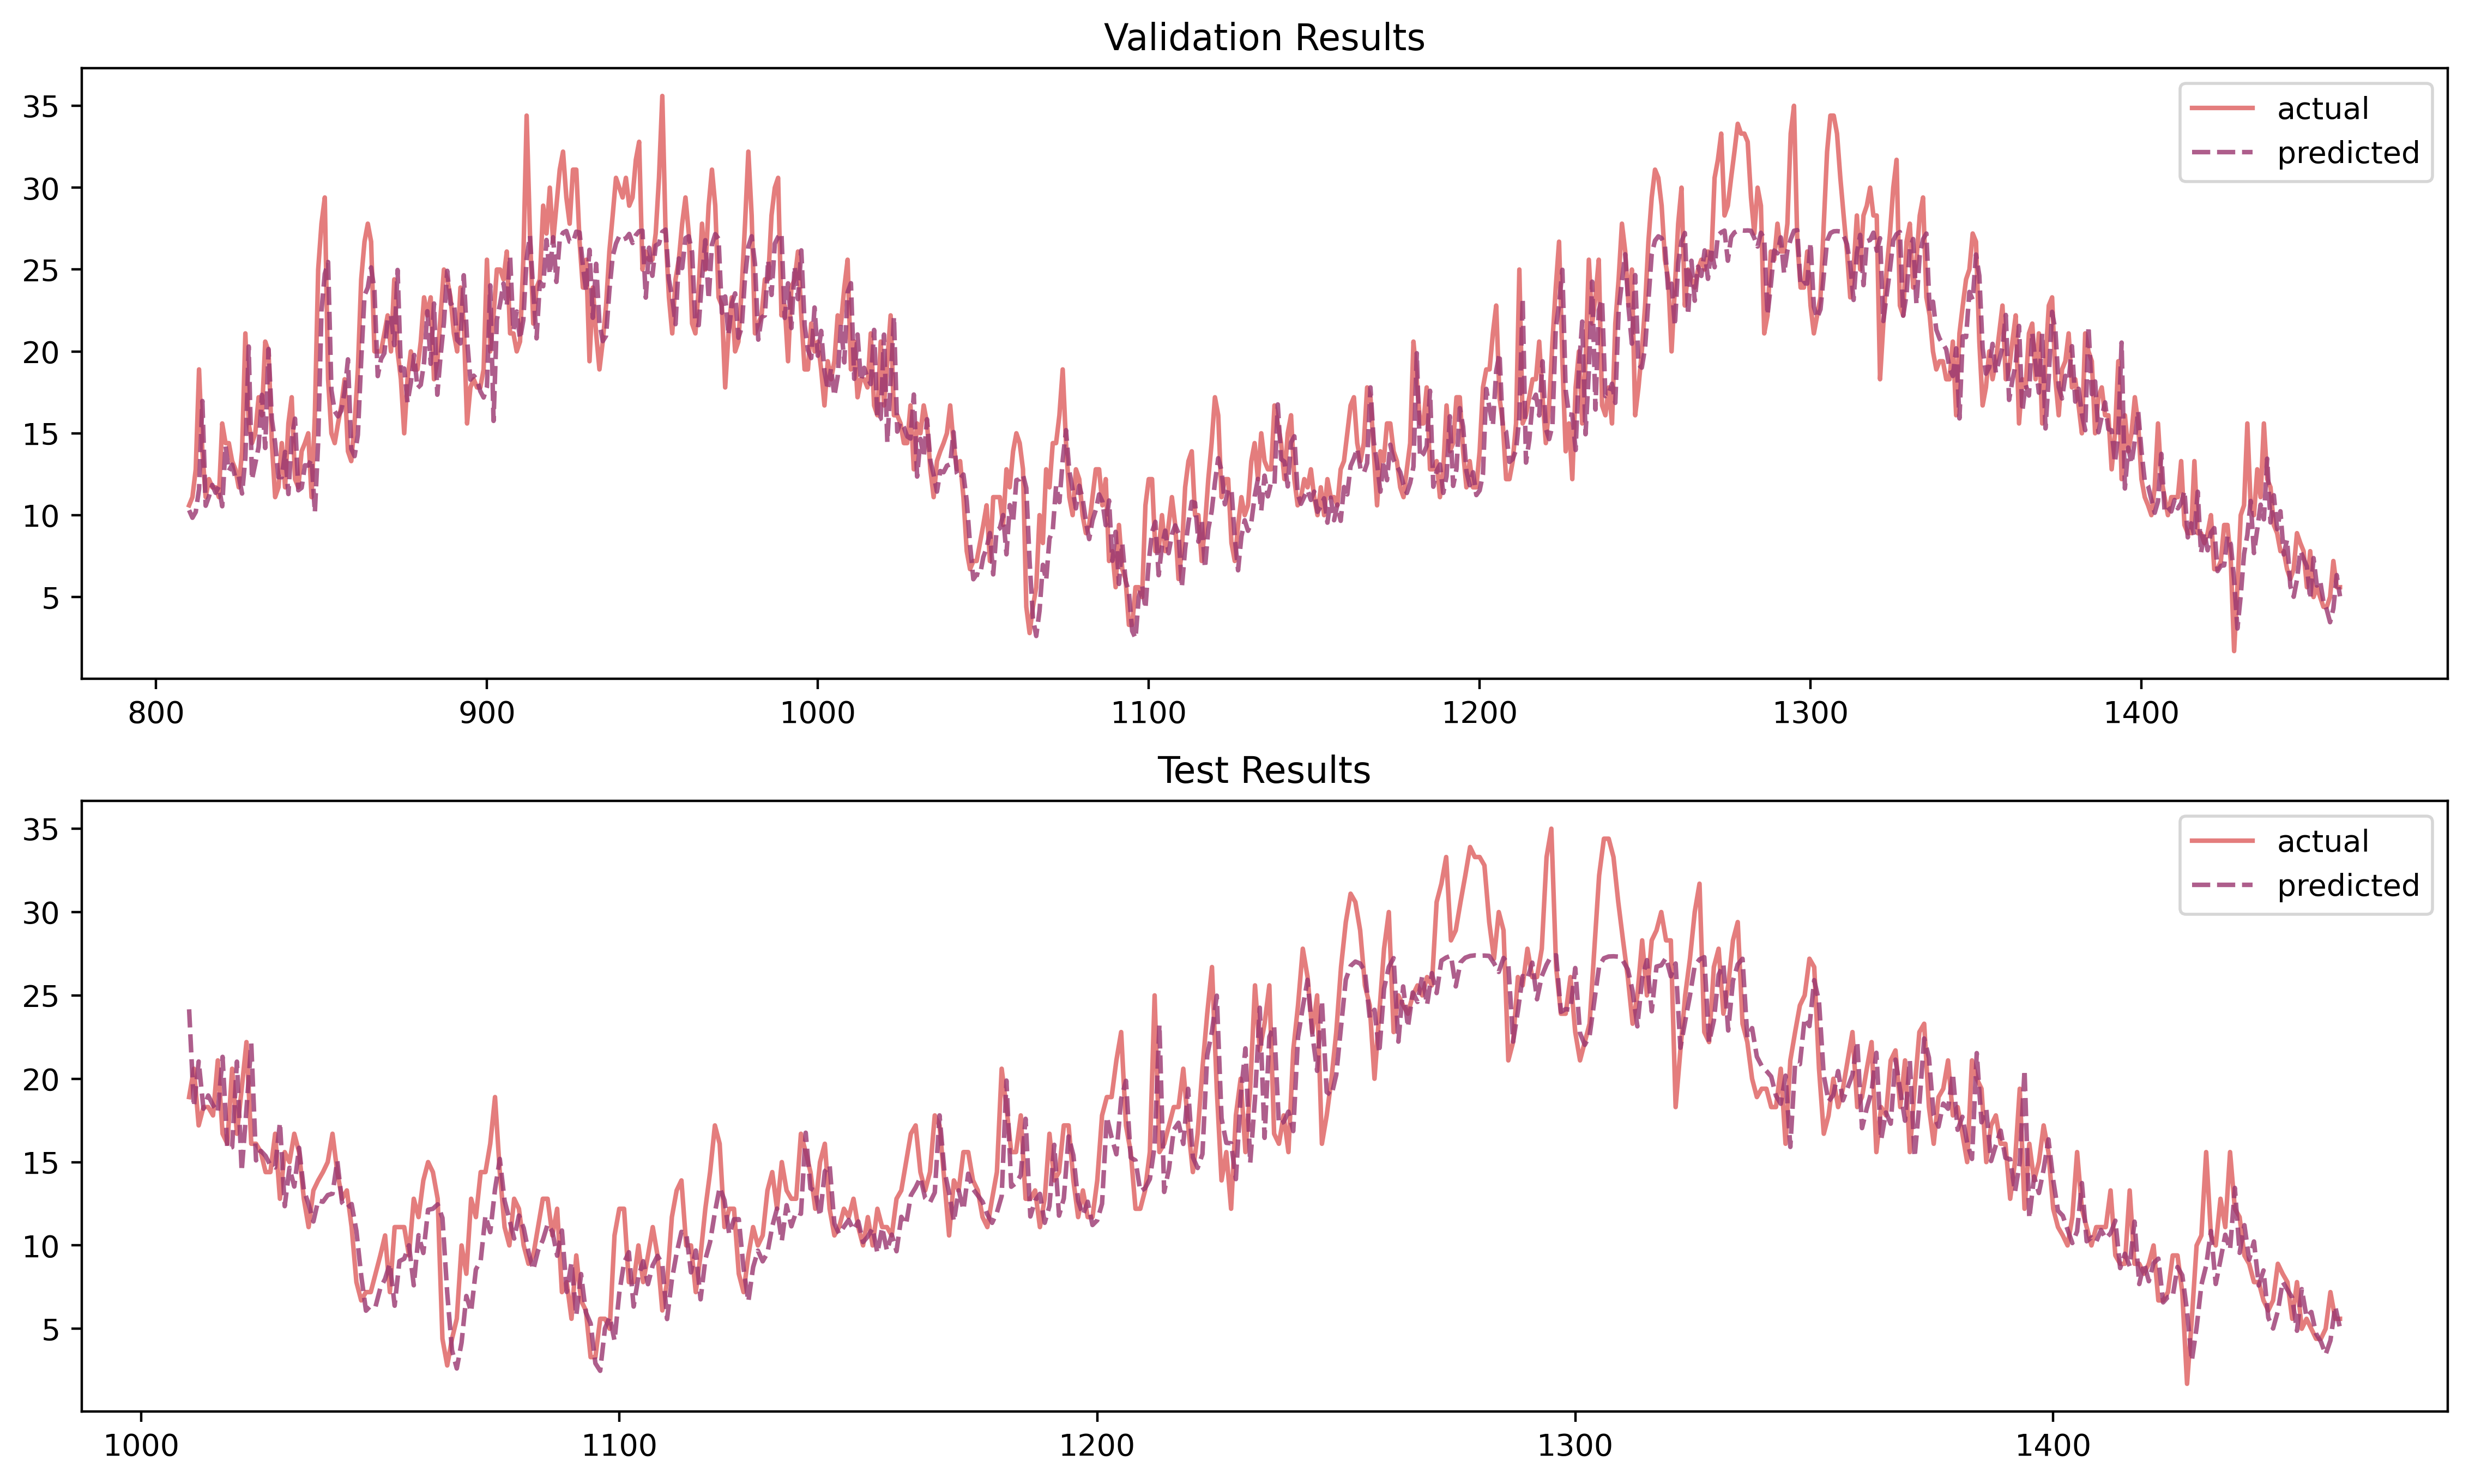

In [23]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);

In [24]:

from keras.layers import SimpleRNN, GRU

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=50))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(units=1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Define the SimpleRNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50, return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50, return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(units=1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the SimpleRNN model
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 229.2505 - val_loss: 217.1210
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 101.2488 - val_loss: 172.7845
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 80.6508 - val_loss: 146.6027
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 68.1311 - val_loss: 127.2839
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 64.0901 - val_loss: 112.3559
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 54.6677 - val_loss: 102.0929
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 57.9891 - val_loss: 93.5736
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 52.6141 - val_loss: 87.5288
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 56.0731 - val_loss: 83.9434
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 54.0789 - val_loss: 80.9568
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 54.1514 - val_loss: 78.8247
Epoch 12/100
25/25 ━━

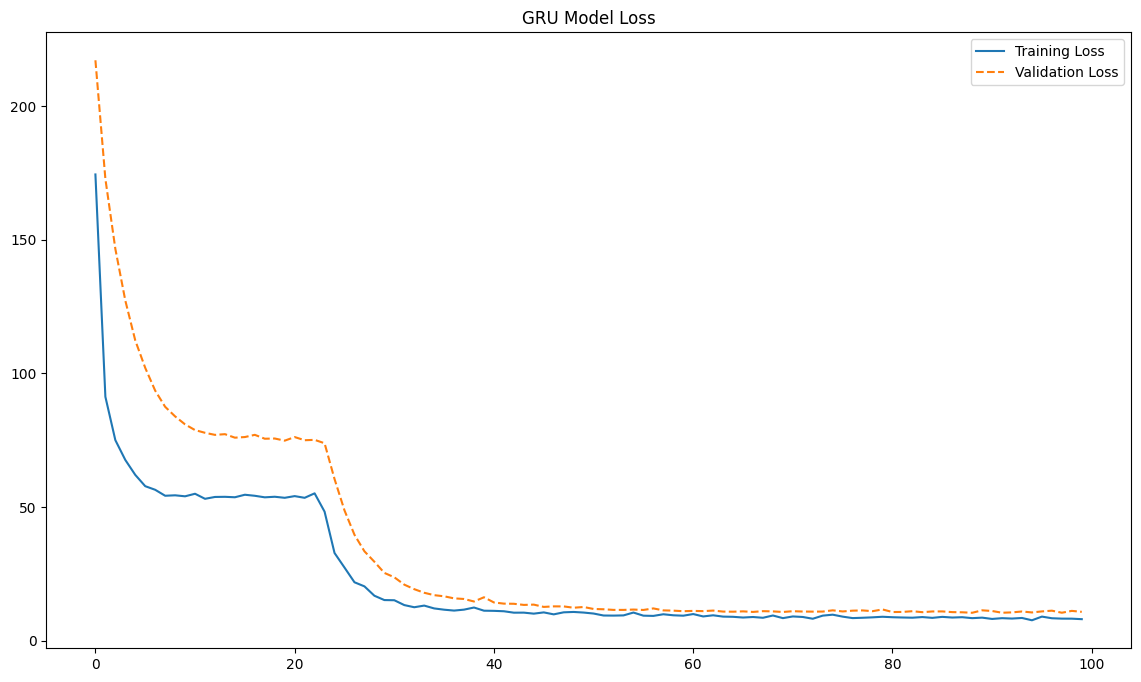

In [25]:
# Visualizing GRU Training Results
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gru_history_df = pd.DataFrame(gru_history.history)
plt.figure(figsize=(14, 8))
plt.plot(gru_history_df['loss'], label='Training Loss')
plt.plot(gru_history_df['val_loss'], label='Validation Loss', linestyle='--')
plt.title("GRU Model Loss")
plt.legend()
plt.show()

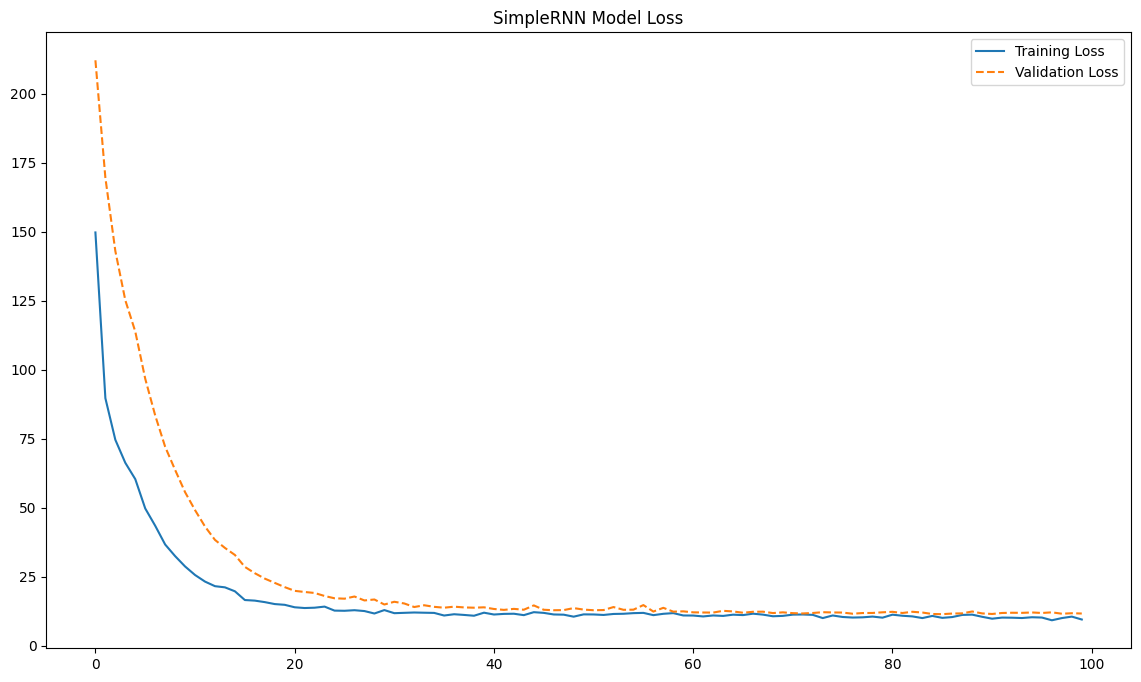

In [26]:

# Visualizing SimpleRNN Training Results
rnn_history_df = pd.DataFrame(rnn_history.history)
plt.figure(figsize=(14, 8))
plt.plot(rnn_history_df['loss'], label='Training Loss')
plt.plot(rnn_history_df['val_loss'], label='Validation Loss', linestyle='--')
plt.title("SimpleRNN Model Loss")
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


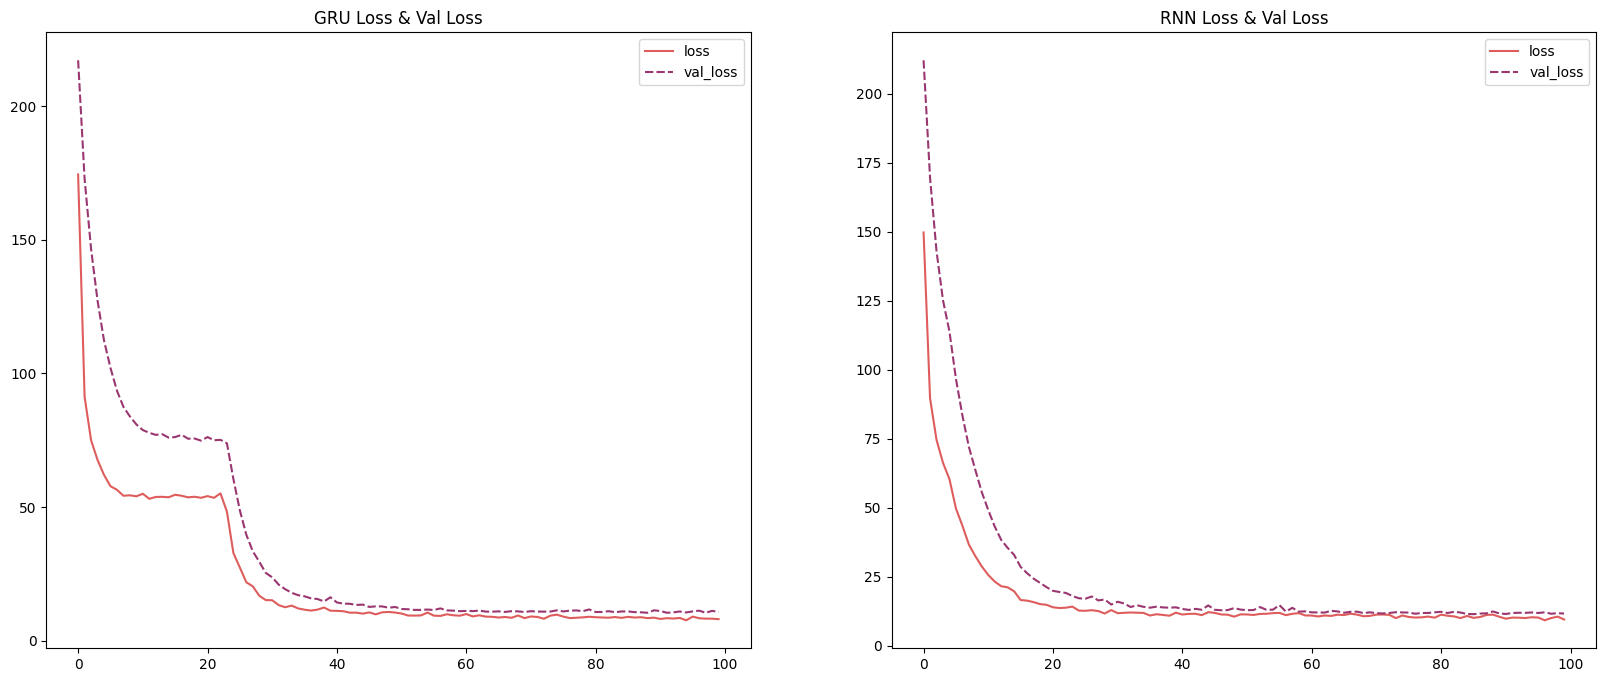

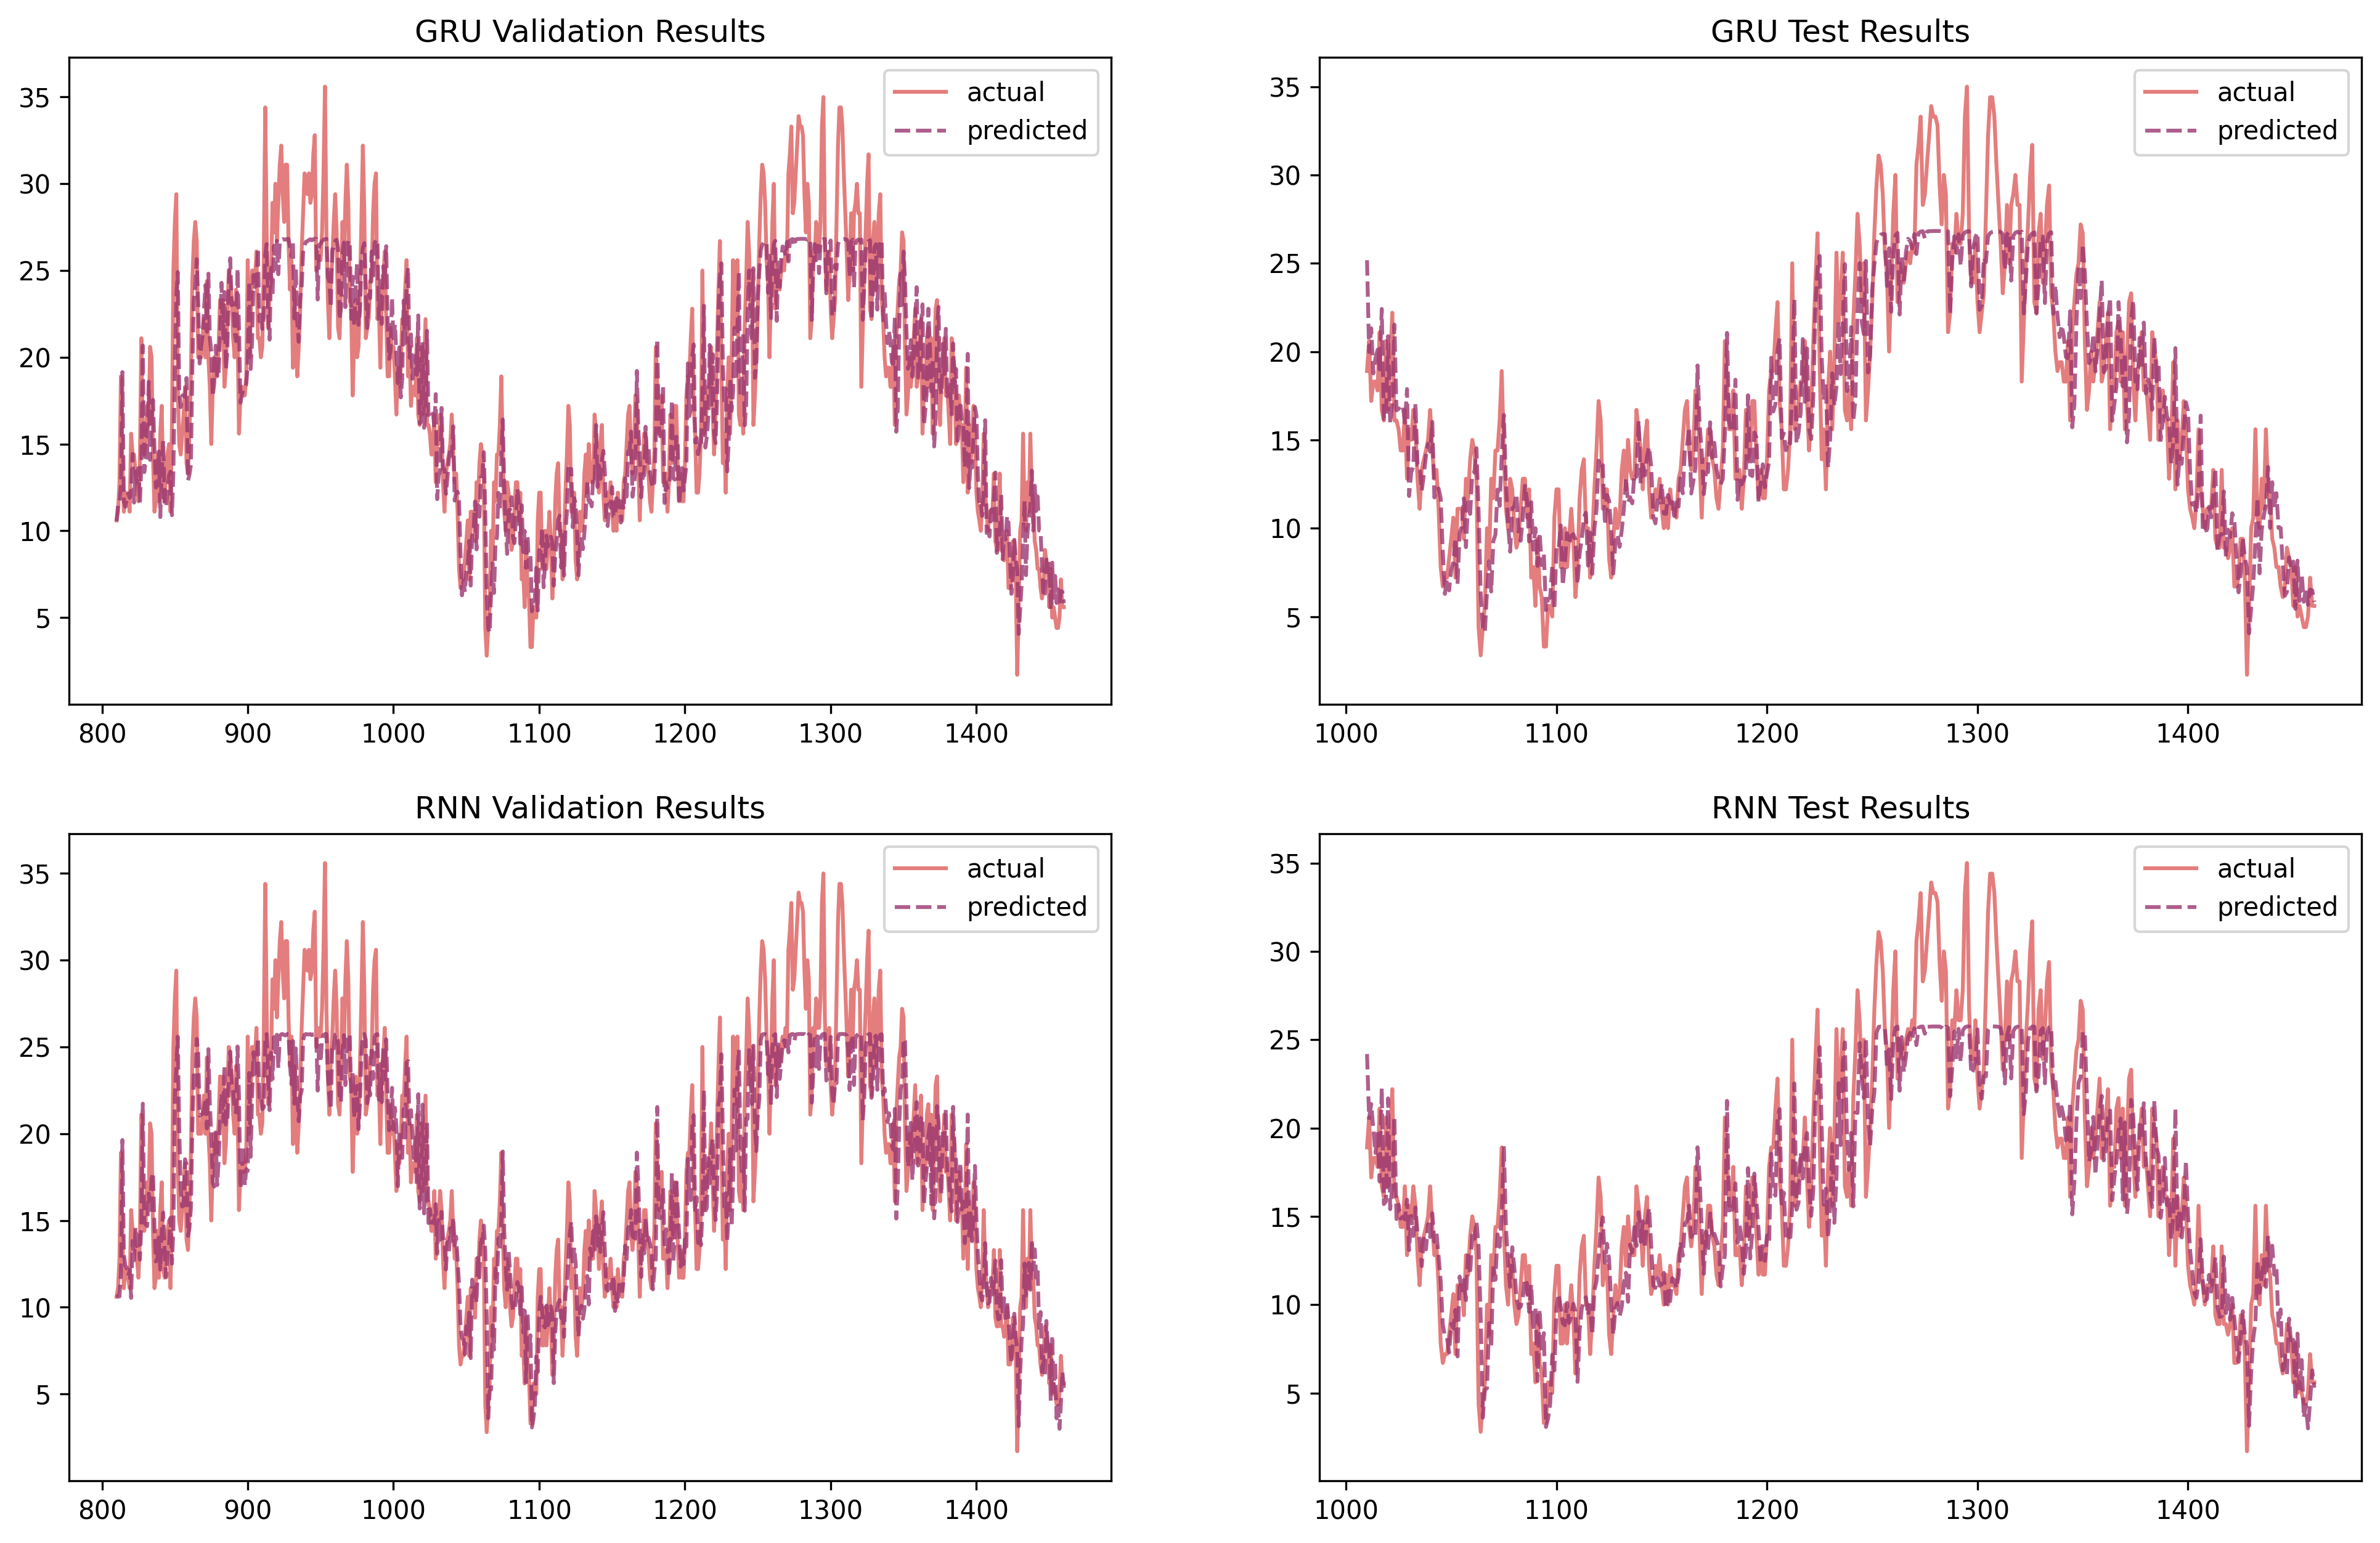

In [27]:
gru_his = pd.DataFrame(gru_history.history)
rnn_his = pd.DataFrame(rnn_history.history)

gru_history_loss = gru_his[['loss','val_loss']]
rnn_history_loss = rnn_his[['loss','val_loss']]

fig,axes = plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)
plt.title("GRU Loss & Val Loss")
sns.lineplot(gru_history_loss,palette="flare");

plt.subplot(1,2,2)
plt.title("RNN Loss & Val Loss")
sns.lineplot(rnn_history_loss,palette="flare");

gru_train_pred = gru_model.predict(X_train).flatten()
gru_val_pred = gru_model.predict(X_val).flatten()
gru_test_pred = gru_model.predict(X_test).flatten()

rnn_train_pred = rnn_model.predict(X_train).flatten()
rnn_val_pred = rnn_model.predict(X_val).flatten()
rnn_test_pred = rnn_model.predict(X_test).flatten()

gru_pred = np.concatenate([gru_train_pred,gru_val_pred,gru_test_pred])
rnn_pred = np.concatenate([rnn_train_pred,rnn_val_pred,rnn_test_pred])

df_gru_pred = pd.DataFrame(df["temp_max"].copy())
df_gru_pred.columns = ["actual"]
df_gru_pred = df_gru_pred[WINDOW:]
df_gru_pred["predicted"] = gru_pred

df_rnn_pred = pd.DataFrame(df["temp_max"].copy())
df_rnn_pred.columns = ["actual"]
df_rnn_pred = df_rnn_pred[WINDOW:]
df_rnn_pred["predicted"] = rnn_pred

fig,axes = plt.subplots(2,2,figsize=(16,10),dpi=300)

plt.subplot(2,2,1)
plt.title("GRU Validation Results")
sns.lineplot(df_gru_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,2,2)
plt.title("GRU Test Results")
sns.lineplot(df_gru_pred[1000:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,2,3)
plt.title("RNN Validation Results")
sns.lineplot(df_rnn_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,2,4)
plt.title("RNN Test Results")
sns.lineplot(df_rnn_pred[1000:],alpha=0.8,palette="flare",linestyle=None);